In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Monthly_CPI_data_w_percent_change.csv', index_col = 0)

In [5]:
df

,Food,Food at home,Cereals and bakery products,Cereals and cereal products,Flour and prepared flour mixes,Breakfast cereal,"Rice, pasta, cornmeal",Bakery products,Bread,"Fresh biscuits, rolls, muffins",...,"Club membership for shopping clubs, fraternal, or other organizations, or participant sports fees","Other pork including roasts, steaks, and ribs",Other uncooked poultry including turkey,Photographers and photo processing,Sugar and sugar substitutes,"Men's underwear, nightwear, swimwear, and accessories","Women's underwear, nightwear, swimwear, and accessories","Computers, peripherals, and smart home assistant devices","Computers, peripherals, and smart home assistants",Day care and preschool
2012-01,232.666,231.694,266.677,234.159,252.159,228.664,242.992,283.880,170.658,167.911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02,232.486,231.180,267.821,233.362,250.564,227.984,242.217,286.484,172.978,168.364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03,232.792,231.383,267.101,232.660,252.104,227.997,238.975,285.771,172.955,168.406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04,233.234,231.711,268.014,233.662,252.102,228.862,240.693,286.589,173.559,166.211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05,233.339,231.518,268.653,235.054,254.336,230.326,241.615,286.629,173.581,167.158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10,284.205,265.478,294.625,239.371,249.956,236.615,245.062,326.628,198.052,195.203,...,146.754,163.543,169.022,123.495,214.923,170.986,103.083,NaN,40.310,322.356
2021-11,285.507,266.384,295.909,241.091,246.663,238.343,248.552,327.648,200.415,197.481,...,146.886,169.605,165.790,126.589,211.673,170.751,101.159,NaN,39.780,322.483
2021-12,286.966,267.555,297.279,243.944,248.322,241.597,251.399,328.129,200.504,194.413,...,147.742,162.026,164.285,124.677,211.733,167.052,100.209,NaN,39.401,322.648
Annual Percent Change 2021,6.300,6.500,4.800,4.800,6.600,6.000,2.800,4.800,3.800,4.700,...,1.800,18.900,5.600,3.100,4.000,7.000,4.400,NaN,2.800,2.700


In [4]:
df.describe()

,Food,Food at home,Cereals and bakery products,Cereals and cereal products,Flour and prepared flour mixes,Breakfast cereal,"Rice, pasta, cornmeal",Bakery products,Bread,"Fresh biscuits, rolls, muffins",...,"Club membership for shopping clubs, fraternal, or other organizations, or participant sports fees","Other pork including roasts, steaks, and ribs",Other uncooked poultry including turkey,Photographers and photo processing,Sugar and sugar substitutes,"Men's underwear, nightwear, swimwear, and accessories","Women's underwear, nightwear, swimwear, and accessories","Computers, peripherals, and smart home assistant devices","Computers, peripherals, and smart home assistants",Day care and preschool
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,70.000000,56.000000,56.000000,56.000000,42.000000,42.000000,42.000000,14.000000,28.000000,28.000000
mean,215.795200,207.168950,235.718329,198.330729,208.671407,194.140329,205.350807,256.991779,155.324043,151.991336,...,121.631443,116.578125,132.699589,104.489786,171.466524,137.342190,87.285262,33.210571,33.434179,270.025071
std,88.743337,84.845644,96.515873,81.191139,85.718224,79.409348,84.200283,105.381930,63.575962,62.246894,...,49.667402,48.664556,55.019305,43.198433,70.252755,56.896283,36.848497,15.681589,13.575514,111.794412
min,-0.200000,-2.000000,-0.700000,-1.600000,-2.600000,-1.600000,-2.100000,-0.600000,-0.900000,-1.600000,...,-0.400000,-4.500000,-4.500000,-5.000000,-0.700000,-2.600000,-4.600000,-5.300000,-1.000000,0.100000
25%,236.479750,233.627000,269.454000,226.808000,234.793250,221.049250,234.514000,290.839000,175.554250,170.488750,...,136.097000,124.175500,145.570500,119.401250,186.592500,155.361750,97.584000,38.656500,37.660750,310.590250
50%,247.881500,239.238500,272.217000,231.249500,240.697500,226.163000,238.565500,296.325000,178.076000,175.729000,...,140.768000,126.944500,148.869500,121.810000,199.164000,158.173000,101.750500,39.471000,38.657500,313.750000
75%,256.618250,242.076750,275.582750,233.561000,248.903000,228.552000,241.239250,303.716500,182.294000,179.302500,...,145.357500,140.040000,161.126500,123.220250,206.852000,162.758000,103.755500,39.741250,39.453500,315.819750
max,286.966000,267.555000,297.279000,243.944000,258.791000,241.597000,251.399000,328.129000,200.504000,197.481000,...,151.327000,169.605000,173.080000,126.589000,214.923000,170.986000,107.774000,40.056000,40.649000,322.648000


There seems to be redundency when it comes to the categories, so we can work on combining similar categories such as food. There are also many blank values, which will impact how we will create our model. Some options could be omiting certain categories to ensure that we are confident in our model or we can creating separate models for different categories.

<AxesSubplot:>

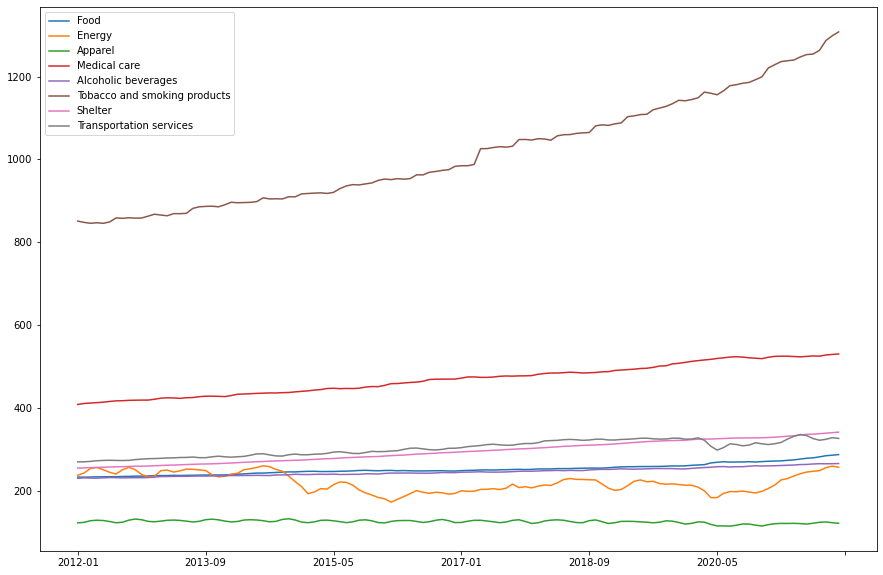

In [43]:
dates = df.loc[~df.index.str.contains("Percent Change"), ["Food", "Energy", "Apparel", "Medical care", "Alcoholic beverages", "Tobacco and smoking products", "Shelter", "Transportation services"]]
dates.plot(figsize = (15, 10))

<AxesSubplot:>

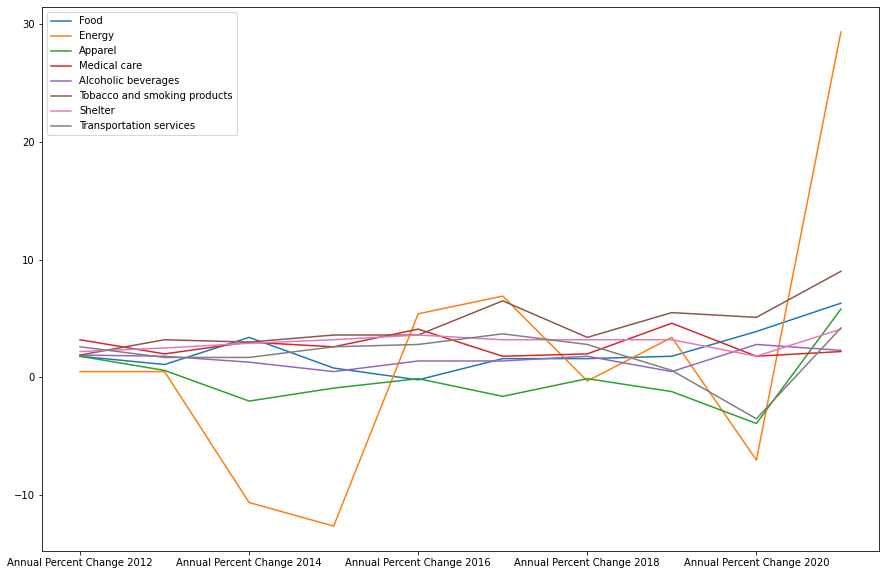

In [45]:
annual_change = df.loc[df.index.str.contains("Annual Percent Change"), ["Food", "Energy", "Apparel", "Medical care", "Alcoholic beverages", "Tobacco and smoking products", "Shelter", "Transportation services"]]
annual_change.plot(figsize = (15, 10))